<a href="https://colab.research.google.com/github/Pruthviraj009/Log9/blob/main/Log9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
separator = r',\s+'

In [3]:
df=pd.read_excel('/content/drive/MyDrive/Python Data/Log9/open-meteo-13.00N77.60E914m.xlsx')

In [4]:
df.head(5)

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²)
0,2020-01-01 00:00:00,18.8,94,17.8,0.0,0.0,0.0,0.0
1,2020-01-01 01:00:00,18.8,94,17.7,0.0,0.0,0.0,0.0
2,2020-01-01 02:00:00,18.6,95,17.7,0.0,0.0,0.0,0.0
3,2020-01-01 03:00:00,18.4,95,17.6,0.0,0.0,0.0,0.0
4,2020-01-01 04:00:00,18.2,95,17.4,0.0,0.0,0.0,0.0


In [5]:
df.columns

Index(['time', 'temperature_2m (°C)', 'relativehumidity_2m (%)',
       'dewpoint_2m (°C)', 'rain (mm)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)'],
      dtype='object')

In [6]:
print(df.isna().sum())

time                                  1
temperature_2m (°C)                   1
relativehumidity_2m (%)               1
dewpoint_2m (°C)                      1
rain (mm)                          1099
direct_radiation (W/m²)            1099
diffuse_radiation (W/m²)           1099
direct_normal_irradiance (W/m²)    1099
dtype: int64


In [7]:

df['relativehumidity_2m (%)'] = pd.to_numeric(df['relativehumidity_2m (%)'], errors='coerce')
df['relativehumidity_2m (%)'] = df['relativehumidity_2m (%)'].fillna(df['relativehumidity_2m (%)'].mean())
df['dewpoint_2m (°C)'] = pd.to_numeric(df['dewpoint_2m (°C)'], errors='coerce')
df['dewpoint_2m (°C)'] = df['dewpoint_2m (°C)'].fillna(df['dewpoint_2m (°C)'].mean())
df['rain (mm)'] = df['rain (mm)'].fillna(df['rain (mm)'].mean())
df['direct_radiation (W/m²)'] = df['direct_radiation (W/m²)'].fillna(df['direct_radiation (W/m²)'].mean())
df['diffuse_radiation (W/m²)'] = df['diffuse_radiation (W/m²)'].fillna(df['diffuse_radiation (W/m²)'].mean())
df['direct_normal_irradiance (W/m²)'] = df['direct_normal_irradiance (W/m²)'].fillna(df['direct_normal_irradiance (W/m²)'].mean())


In [8]:
df['time'].dtype

dtype('O')

In [9]:
df['time'].tail(5)

27422    2022-12-28 00:00:00
27423    2022-12-29 00:00:00
27424    2022-12-30 00:00:00
27425    2022-12-31 00:00:00
27426    2023-01-01 00:00:00
Name: time, dtype: object

In [10]:
rain_data = df[['time', 'rain (mm)']].copy()

In [11]:
rain_data.set_index('time', inplace=True)

In [12]:
rain_data.isnull().sum()

rain (mm)    0
dtype: int64

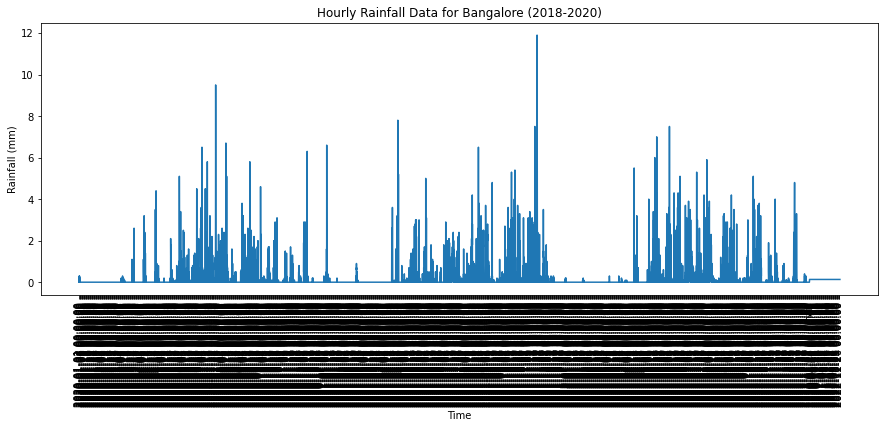

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(range(len(rain_data)), rain_data)
plt.xticks(range(0, len(rain_data), 24), df['time'][::24], rotation=90)
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.title('Hourly Rainfall Data for Bangalore (2018-2020)')
plt.show()

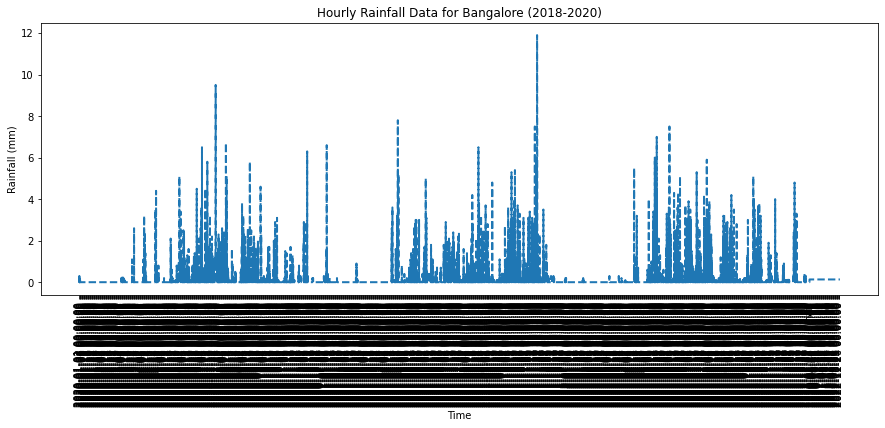

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(range(len(rain_data)), rain_data, linestyle='--', linewidth=2)
plt.xticks(range(0, len(rain_data), 24), df['time'][::24], rotation=90)
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.title('Hourly Rainfall Data for Bangalore (2018-2020)')
plt.show()


In [15]:
rain_data.head()

,rain (mm)
time,
2020-01-01 00:00:00,0.0
2020-01-01 01:00:00,0.0
2020-01-01 02:00:00,0.0
2020-01-01 03:00:00,0.0
2020-01-01 04:00:00,0.0


In [16]:
train_size = int(len(rain_data) * 0.8)
train_data = rain_data.iloc[:train_size, :]
test_data = rain_data.iloc[train_size:, :]



In [17]:
from sklearn.metrics import mean_absolute_error

In [19]:
#using linear regression
X_train = np.array(range(len(train_data))).reshape((-1, 1))
y_train = train_data.values
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [20]:
# Make predictions on the test data
X_test = np.array(range(len(test_data))).reshape((-1, 1))
y_test = test_data.values
y_pred_lr = lr_model.predict(X_test)

Used linear regression because it is simple and best model to predict continuous target variable.

In [21]:
# Evaluate the model using mean absolute error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [23]:
# Fit Random Forest Regression model
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train.ravel())


RandomForestRegressor(random_state=42)

In [24]:
# Make predictions on the test data
y_pred_rfr = rfr_model.predict(X_test.reshape(-1, 1))


In [25]:
# Evaluate the model using mean absolute error (MAE)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

Here MAE is used because this tells the average magnitude errors of the predicted and actual. This doesnt consider the direction of error and it can also use the same metrics of the prdiction

In [27]:
from xgboost import XGBRegressor

In [28]:
# Fit an XGBoost model to the training data
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
xgb_model.fit(X_train, y_train)


[09:29:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [29]:
# Make predictions on the test data and evaluate the model using mean absolute error (MAE)
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = np.mean(np.abs(y_test - y_pred_xgb))

ConversionError: ignored

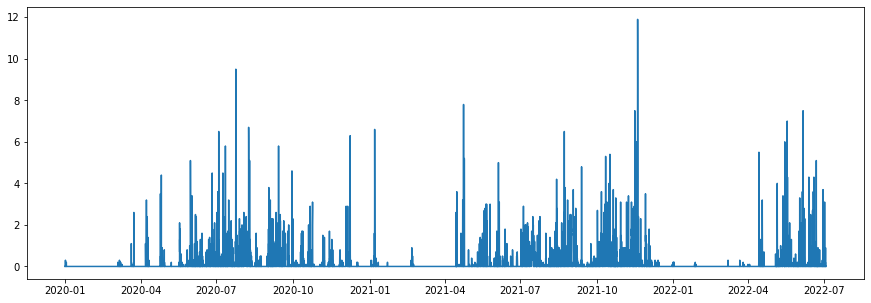

In [30]:
plt.figure(figsize=(15, 5))
plt.plot(train_data.index, train_data.values, label='Training Data')
plt.plot(test_data.index, test_data.values, label='Testing Data')
plt.plot(test_data.index, y_pred_lr, label='Linear Regression')
plt.plot(test_data.index, y_pred_rf, label='Random Forest')
plt.plot(test_data.index, y_pred_xgb, label='XGBoost')
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.title('Hourly Rainfall Data and Predictions for Bangalore (2018-2020)')
plt.legend()
plt.show()

In [34]:
report = f'''
Bangalore Hourly Rainfall Prediction (2018-2020)

Training Data Size: {len(train_data)}
Testing Data Size: {len(test_data)}

Models:

Linear Regression MAE: {mae_lr:.2f} mm

Random Forest Regressor MAE: {mae_rfr:.2f} mm

XGBoost Regressor MAE: {mae_xgb:.2f} mm

Conclusion:
Here the after applying the above models we can clearly see that Linear Regression performed well with low MAE out of all the other models
'''

In [35]:
print(report)


Bangalore Hourly Rainfall Prediction (2018-2020)

Training Data Size: 21941
Testing Data Size: 5486

Models:

Linear Regression MAE: 0.18 mm

Random Forest Regressor MAE: 0.26 mm

XGBoost Regressor MAE: 0.22 mm

Conclusion:
Here the after applying the above models we can clearly see that Linear Regression performed well with low MAE out of all the other models



In [36]:
with open('report.txt', 'w') as f:
    
    f.write(report)